In [129]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits

In [160]:
import numpy as np


def average_tree_score(classifier):
    model_accuracies = []
    for repetition in range(100):
        x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.3)
        classifier.fit(x_train,np.array(y_train).ravel())
        classifier_accuracy = classifier.score(x_test, y_test)
        model_accuracies.append(classifier_accuracy)
    plt.hist(model_accuracies)
    plt.title('Accuracy average score: {}'.format(np.average(classifier_accuracy)));

In [161]:
df = pd.read_json('movies.json')
filename_movies = r'movies.json'
with open(filename_movies, 'r') as file:
    data = json.load(file)

movie_data = [movie['data']['movie'] for movie in data.values()]

flat_data_movies = pd.json_normalize(movie_data)

flat_data_movies.dropna(inplace=True)

flat_data_movies.drop('summary', axis=1,inplace=True)

flat_data_movies.drop('cast', axis=1,inplace=True)

flat_data_movies.columns = flat_data_movies.columns.str.replace('director', 'author')

flat_data_movies['author'] = flat_data_movies['author'].apply(lambda x: x[0])

flat_data_movies['genres'] = flat_data_movies['genres'].apply(lambda x: x[0])

In [162]:
flat_data_movies

,title,criticScore,year,author,releaseDate,genres,rating,runtime,numOfCriticReviews,numOfPositiveCriticReviews,numOfMixedCriticReviews,numOfNegativeCriticReviews
0,The Shining,66.0,1980,Stanley Kubrick,"May 23, 1980",Horror,R,146 min,26.0,16.0,8.0,2.0
1,Alien,89.0,1979,Ridley Scott,"June 22, 1979",Horror,R,117 min,34.0,31.0,1.0,2.0
2,Die Hard,72.0,1988,John McTiernan,"July 15, 1988",Crime,R,131 min,14.0,10.0,4.0,0.0
3,A Few Good Men,62.0,1992,Rob Reiner,"December 11, 1992",Crime,R,138 min,21.0,12.0,6.0,3.0
4,Rocky,70.0,1976,John G. Avildsen,"December 3, 1976",Sport,PG,120 min,14.0,10.0,4.0,0.0
5,The Princess Bride,77.0,1987,Rob Reiner,"September 25, 1987",Family,PG,98 min,20.0,16.0,4.0,0.0
6,Toy Story,96.0,1995,John Lasseter,"November 22, 1995",Family,TV-G,81 min,26.0,26.0,0.0,0.0
7,The Dark Knight Rises,78.0,2012,Christopher Nolan,"July 20, 2012",Crime,PG-13,165 min,45.0,37.0,6.0,2.0
8,American Beauty,84.0,1999,Sam Mendes,"September 15, 1999",Drama,R,122 min,34.0,30.0,3.0,1.0
9,Inglourious Basterds,69.0,2009,Eli Roth,"August 21, 2009",War,R,153 min,36.0,26.0,9.0,1.0


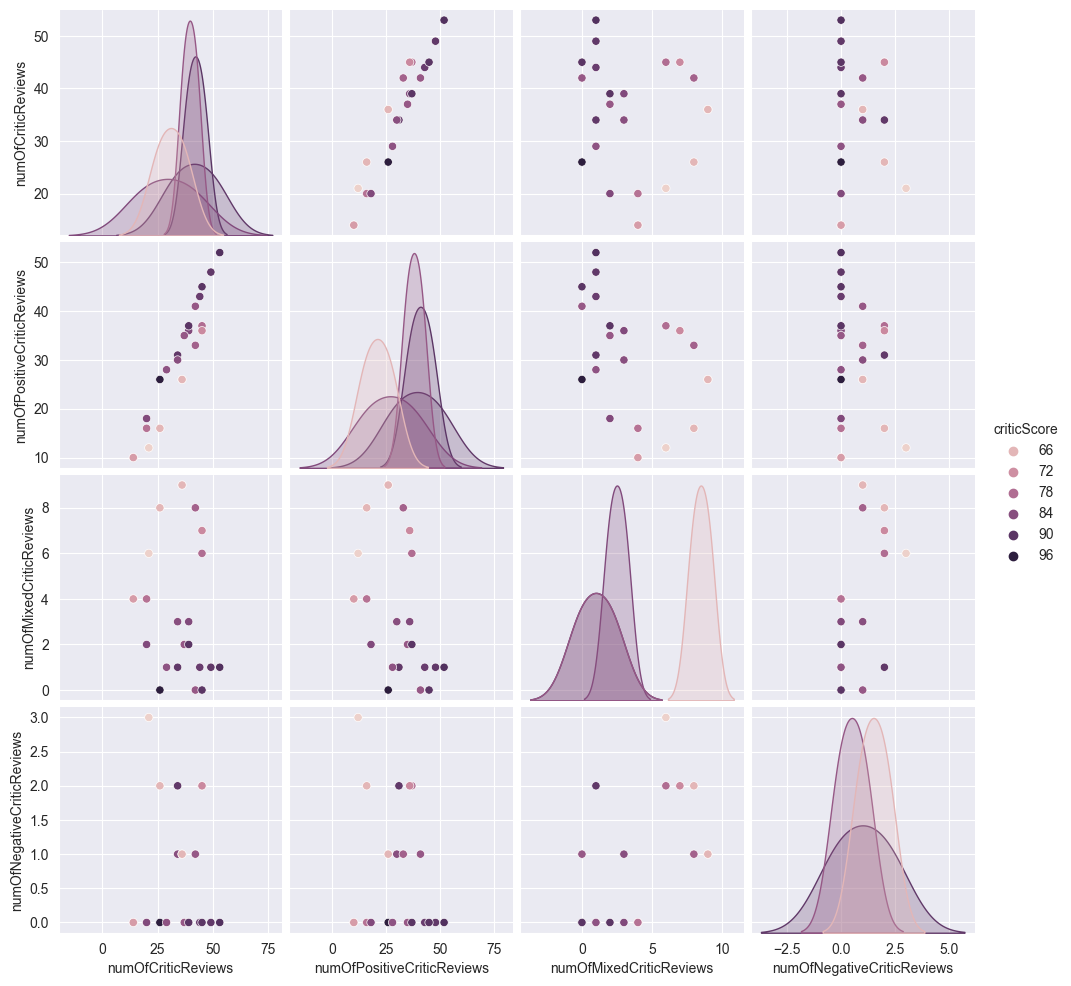

In [163]:
sns.pairplot(flat_data_movies[['title','criticScore','year','author','releaseDate','genres','rating','runtime','numOfCriticReviews','numOfPositiveCriticReviews','numOfMixedCriticReviews','numOfNegativeCriticReviews']], hue='criticScore')

In [164]:
# Separate the features and target
features = flat_data_movies.drop(['criticScore'], axis=1)
target = flat_data_movies['criticScore']

In [165]:
# features

In [166]:
# target

In [167]:
# Load the digits dataset
digits = load_digits()

# Access the features and target variables
features = digits.data
target = digits.target


In [168]:
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [169]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [170]:
# Create and train the decision tree classifier
tree = DecisionTreeClassifier()

knn = KNeighborsClassifier()

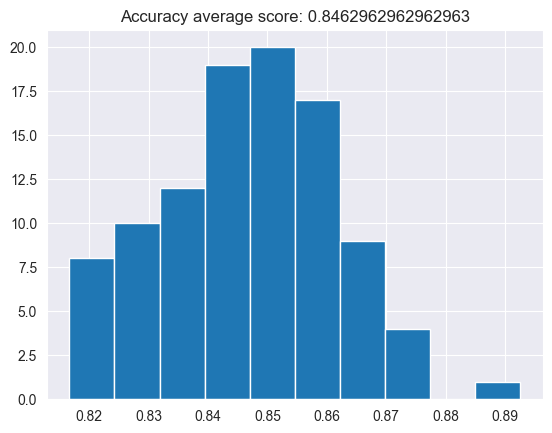

In [171]:
average_tree_score(tree)

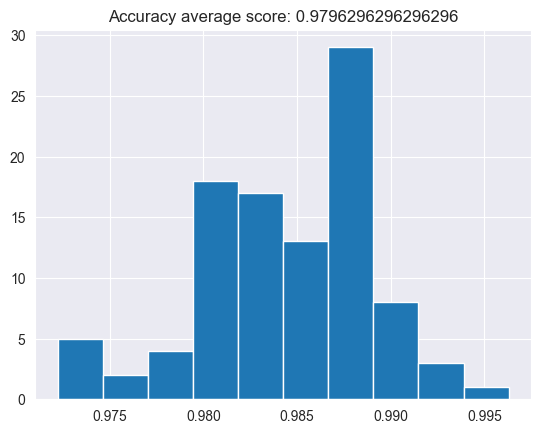

In [172]:
average_tree_score(knn)

## Albuns

In [135]:
df = pd.read_json('albums.json')

filename_albums = r'albums.json'
with open(filename_albums, 'r') as file:
    data = json.load(file)

album_data = [album['data']['album'] for album in data.values()]

flat_data_albums = pd.json_normalize(album_data)

flat_data_albums.dropna(inplace=True)

flat_data_albums.columns = flat_data_albums.columns.str.replace('album', 'title') #change the column name from 'album' to 'title'
flat_data_albums = flat_data_albums.drop('url', axis=1)

flat_data_albums.columns = flat_data_albums.columns.str.replace('artist', 'author') #Change the column name from 'artist' to 'author'
flat_data_movies['genres'] = flat_data_movies['genres'].apply(lambda x: x[0])


In [136]:
flat_data_albums

,title,author,releaseDate,criticScore,publisher,genres,numOfCriticReviews,numOfPositiveCriticReviews,numOfMixedCriticReviews,numOfNegativeCriticReviews
0,Rumours [35th Anniversary Deluxe Edition],Fleetwood Mac,"Jan 29, 2013",99,Rhino,[],11,11,0,0
1,Appetite for Destruction: Super Deluxe Edition...,Guns N' Roses,"Jun 29, 2018",95,Geffen,[Pop],10,10,0,0
2,The Joshua Tree [30th Anniversary Super Deluxe...,U2,"Jun 2, 2017",90,Island,[Pop/Rock],5,5,0,0
3,21,Adele,"Feb 22, 2011",76,XL,"[R&B, Soul, Pop/Rock, Adult Alternative Pop/Ro...",34,26,8,0
4,The Eminem Show,Eminem,"May 28, 2002",75,Interscope,[Rap],20,15,4,1
5,Legend,John Legend,"Sep 9, 2022",66,Republic,"[Pop, R&B, Adult Contemporary R&B, Contemporar...",4,2,2,0
6,Goodbye Yellow Brick Road [40th Anniversary Ed...,Elton John,"Mar 25, 2014",92,Universal,[Pop],8,8,0,0
7,1989,Taylor Swift,"Oct 27, 2014",76,Big Machine Records,[Pop/Rock],29,21,8,0
8,Faith: Special Edition,George Michael,"Feb 1, 2011",90,Sony Music,[],8,8,0,0
9,Physical Graffiti [Remastered],Led Zeppelin,"Feb 24, 2015",97,Atlantic,"[Pop/Rock, Hard Rock]",10,10,0,0


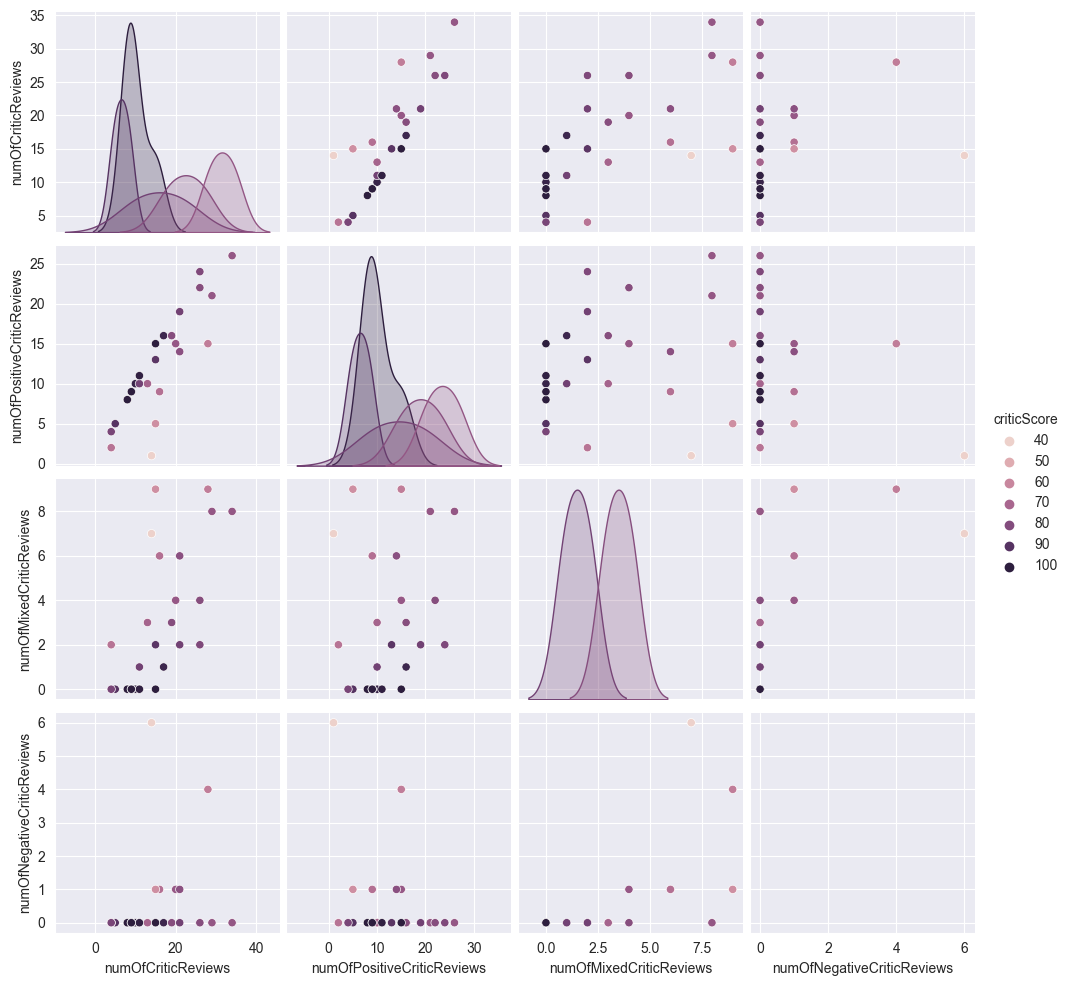

In [144]:
sns.pairplot(flat_data_albums[['title','author','releaseDate','criticScore','publisher','genres','numOfCriticReviews','numOfPositiveCriticReviews','numOfMixedCriticReviews','numOfNegativeCriticReviews']], hue='criticScore')


In [151]:
# Separate the features and target
features = flat_data_albums.drop(['criticScore'], axis=1)
target = flat_data_albums['criticScore']

In [152]:
#features

In [153]:
#target

In [154]:
# Load the digits dataset
digits = load_digits()

# Access the features and target variables
features = digits.data
target = digits.target


In [155]:
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [156]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [157]:
# Create and train the decision tree classifier
tree = DecisionTreeClassifier()

knn = KNeighborsClassifier()

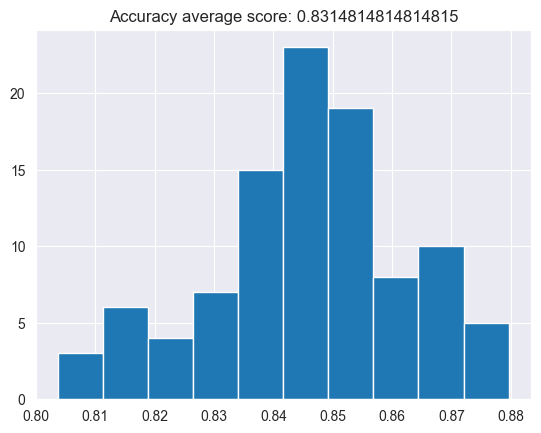

In [158]:
average_tree_score(tree)

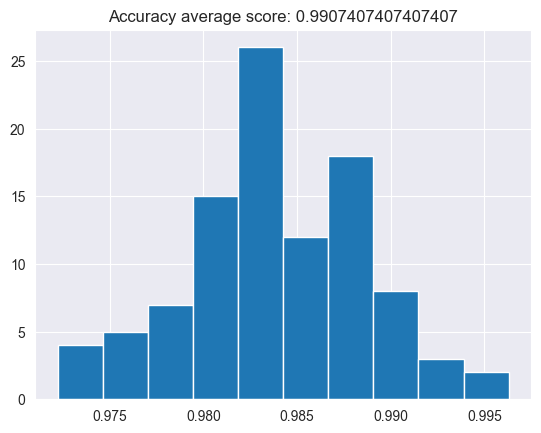

In [159]:
average_tree_score(knn)

In [ ]:
df_3 = pd.read_json('tvshows.json')
filename_tvshows = r'tvshows.json'
with open(filename_tvshows, 'r') as file:
    data = json.load(file)

tvshow_data = [tvshow['data']['tvshow'] for tvshow in data.values()]

flat_data_tvshows = pd.json_normalize(tvshow_data)

flat_data_tvshows.dropna(inplace=True)
flat_data_tvshows=flat_data_tvshows.drop('season', axis=1)
flat_data_tvshows.columns = flat_data_tvshows.columns.str.replace('director', 'author')

In [ ]:
flat_data_tvshows

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Assuming flat_data_movies is your DataFrame

# Convert feature values to stringsa
flat_data_tvshows = flat_data_tvshows.astype(str)

# Separate the features and target
features = flat_data_tvshows.drop(['criticScore'], axis=1)
target = flat_data_tvshows['criticScore']

# Perform one-hot encoding on the features
encoder = OneHotEncoder()
features_encoded = encoder.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

# Create and train the decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Make predictions on the test set and calculate accuracy
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [ ]:
# Merge the three datasets
merged_df = pd.concat([flat_data_movies, flat_data_albums, flat_data_tvshows], ignore_index=True)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Remove column width restriction

In [ ]:
merged_df